# For gender only

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
model = tf.keras.models.load_model('model/GenderModel-Pro.keras')

def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(100, 100))  # size for image
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  
    img_array /= 255.0  
    return img_array

1/1 [==============================] - 3s 3s/step


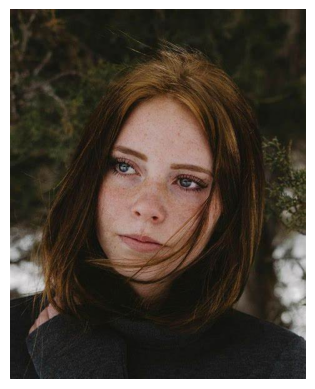

Prediction Value: 0.0065
Predicted Gender: Female


In [3]:
def predict_gender(img_path):
    img_array = prepare_image(img_path)

    prediction = model.predict(img_array)
    prediction_value = prediction[0][0]  

    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')  
    plt.show()

    print(f'Prediction Value: {prediction_value:.4f}') 

    if prediction_value > 0.5:
        return 'Male' 
    else:
        return 'Female' 

img_path = 'test.jpg'
predicted_gender = predict_gender(img_path)
print(f'Predicted Gender: {predicted_gender}')

# For gender + age

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [5]:
model = load_model('model/AgeGenderModel-Pro.keras')

def prepare_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError("Can't load image, please check path of image")

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (100, 100))
    
    image = image / 255.0
    
    image = np.expand_dims(image, axis=0)
    
    return image

In [6]:
def predict_age_gender(image_path):

    image = prepare_image(image_path)
    
    predictions = model.predict(image)
    gender_pred = predictions[0][0][0]  
    age_pred = predictions[1][0][0]   
    
    gender = "Male" if gender_pred < 0.5 else "Female"
    
    return gender, age_pred

1/1 [==============================] - 0s 213ms/step
Predicted Gender: Female
Predicted Age: 52


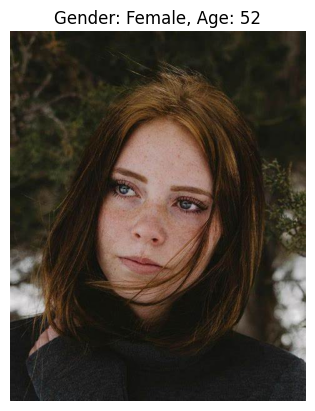

In [7]:
image_path = "test.jpg" 
gender, age = predict_age_gender(image_path)

print(f"Predicted Gender: {gender}")
print(f"Predicted Age: {int(age)}")

image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.title(f"Gender: {gender}, Age: {int(age)}")
plt.axis('off')
plt.show()